JADE Dataset Sample:


,Timestamp,Sender,Receiver,ConversationID,Performative,RTT_ms,MessageSize_bytes,Success,AdditionalInfo,Ontology,Platform
0,2025-04-28 23:27:03.749228800+00:00,Profesor0,SalaE6,neg-ROJAS RODRIGUEZ RO-SalaE6-1745882823692,propose,55.021,750,True,{},classroom-availability,JADE
1,2025-04-28 23:27:03.762268700+00:00,Profesor0,SalaLC6,neg-ROJAS RODRIGUEZ RO-SalaLC6-1745882823692,propose,69.252,751,True,{},classroom-availability,JADE
2,2025-04-28 23:27:03.762268700+00:00,Profesor0,SalaIC3,neg-ROJAS RODRIGUEZ RO-SalaIC3-1745882823692,propose,69.776,751,True,{},classroom-availability,JADE
3,2025-04-28 23:27:03.763267500+00:00,Profesor0,SalaLAMB,neg-ROJAS RODRIGUEZ RO-SalaLAMB-1745882823692,propose,70.523,752,True,{},classroom-availability,JADE
4,2025-04-28 23:27:03.763267500+00:00,Profesor0,SalaCM3,neg-ROJAS RODRIGUEZ RO-SalaCM3-1745882823683,propose,71.594,751,True,{},classroom-availability,JADE



SPADE Dataset Sample:


,Timestamp,Sender,Receiver,ConversationID,Performative,RTT_ms,MessageSize_bytes,Success,AdditionalInfo,Ontology,Platform
0,2025-04-27 15:39:08.601137,ROJAS RODRIGUEZ RO,salacm3@localhost,cfp-ac805810-5a62-4225-8ed4-588ff0e27f26,propose,135.671,355,True,NaN,classroom-availability,SPADE
1,2025-04-27 15:39:08.718147,ROJAS RODRIGUEZ RO,salalc6@localhost,cfp-5dbf1d21-3da7-4d44-8b71-caff62cb2a44,propose,251.756,355,True,NaN,classroom-availability,SPADE
2,2025-04-27 15:39:08.869935,ROJAS RODRIGUEZ RO,salae6@localhost,cfp-766f4f6c-5455-45f8-9095-478a484e9f91,propose,403.376,354,True,NaN,classroom-availability,SPADE
3,2025-04-27 15:39:08.954135,ROJAS RODRIGUEZ RO,salalamb@localhost,cfp-9f887bfc-b867-4b5a-a632-5addb96d5aa5,propose,484.862,356,True,NaN,classroom-availability,SPADE
4,2025-04-27 15:39:09.020245,ROJAS RODRIGUEZ RO,salaic3@localhost,cfp-4223c68c-296e-4f35-9bbf-c8c9a48cf84a,propose,549.838,355,True,NaN,classroom-availability,SPADE



Basic Statistics by Platform:


RTT_ms                                      MessageSize_bytes  \
            mean  median     std   min      max count              mean   
Platform                                                                  
JADE        1.47    0.59    6.88  0.14    71.59   470            593.32   
SPADE     531.35  500.28  337.84  7.21  1780.26   462            277.35   

                                 Success        
         median     std min  max    mean count  
Platform                                        
JADE      646.5  176.13  19  753    0.93   470  
SPADE     295.5   65.90  19  357    1.00   462

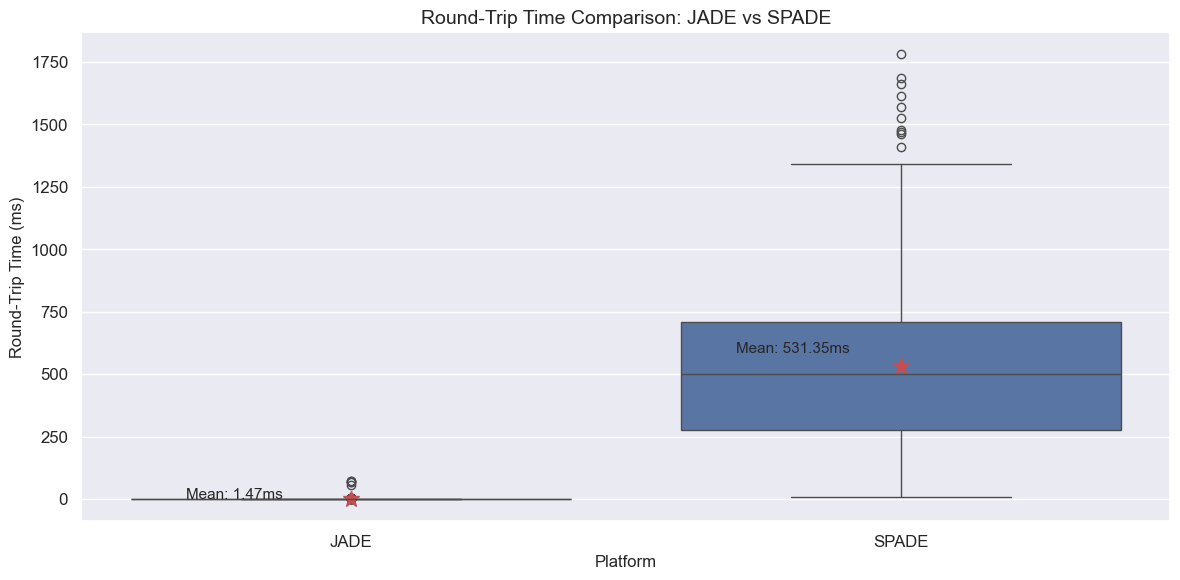

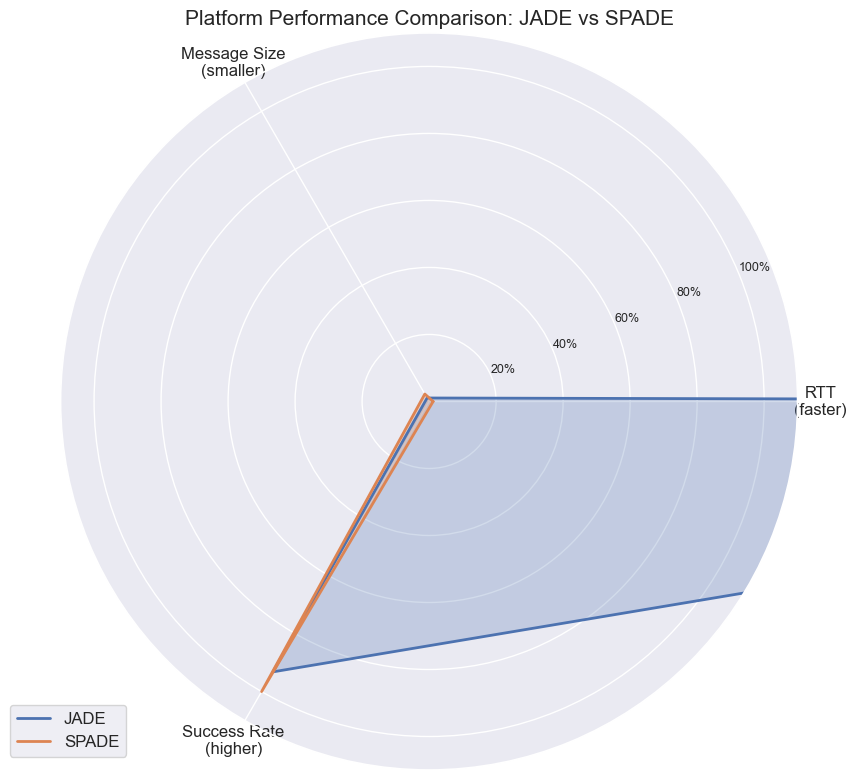

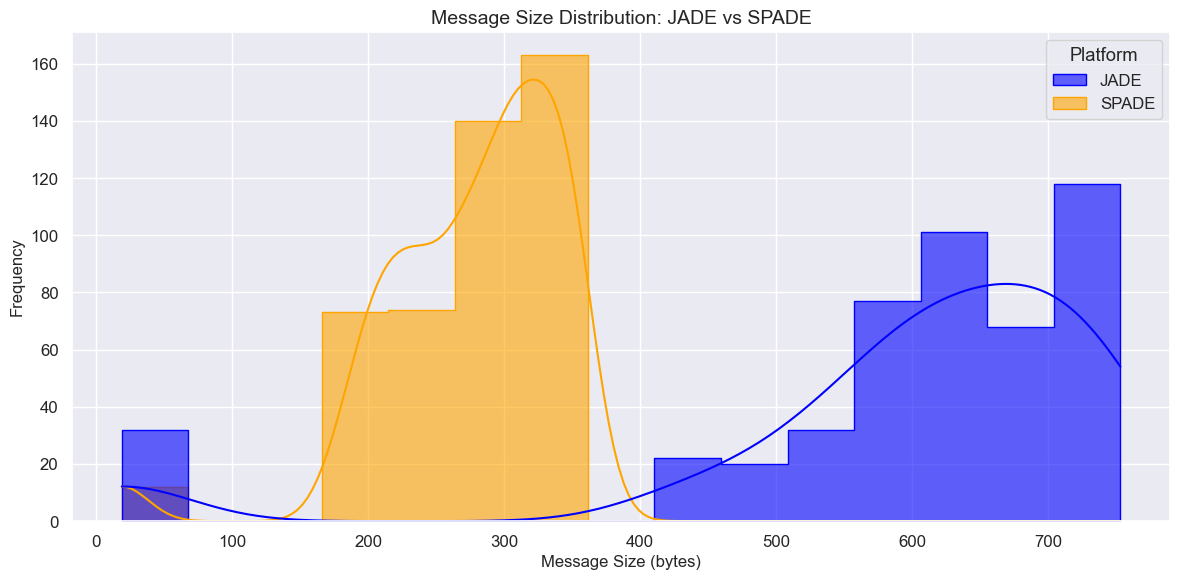

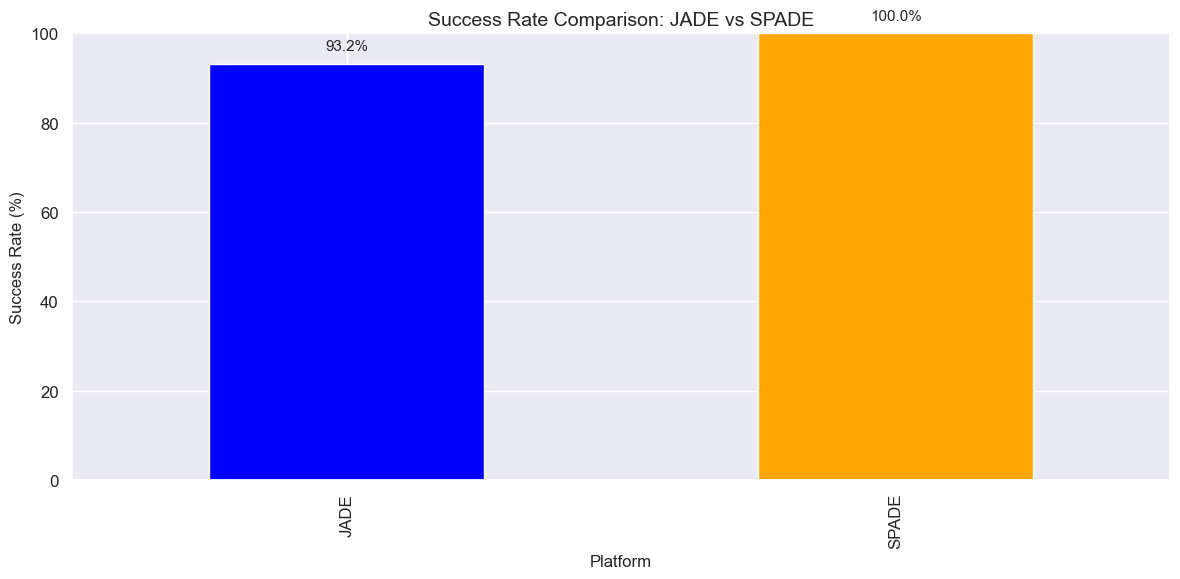

<Figure size 1200x600 with 0 Axes>

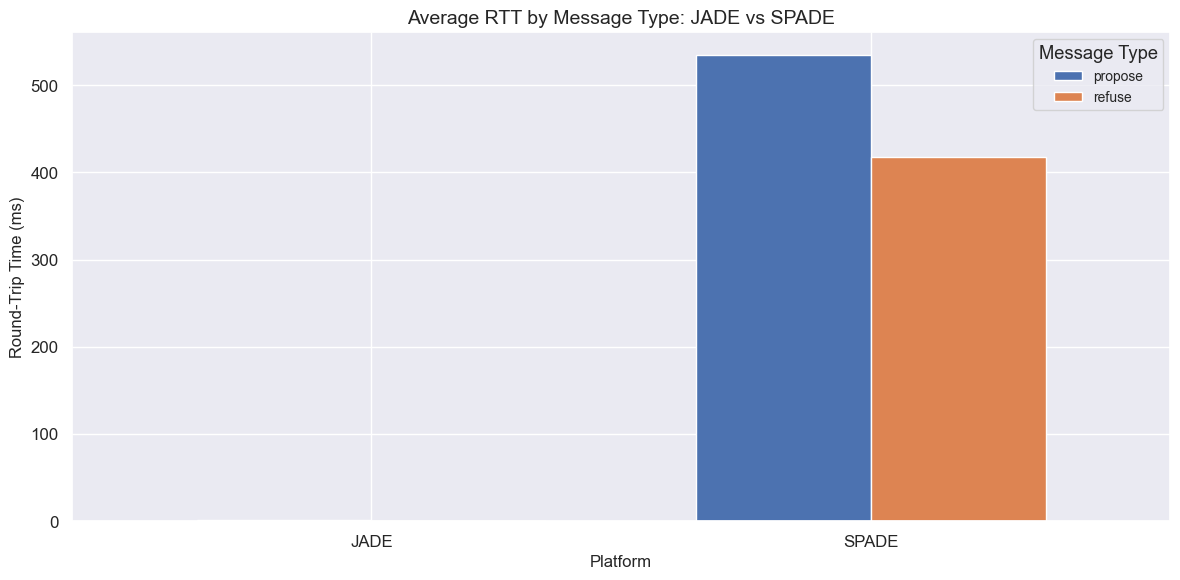

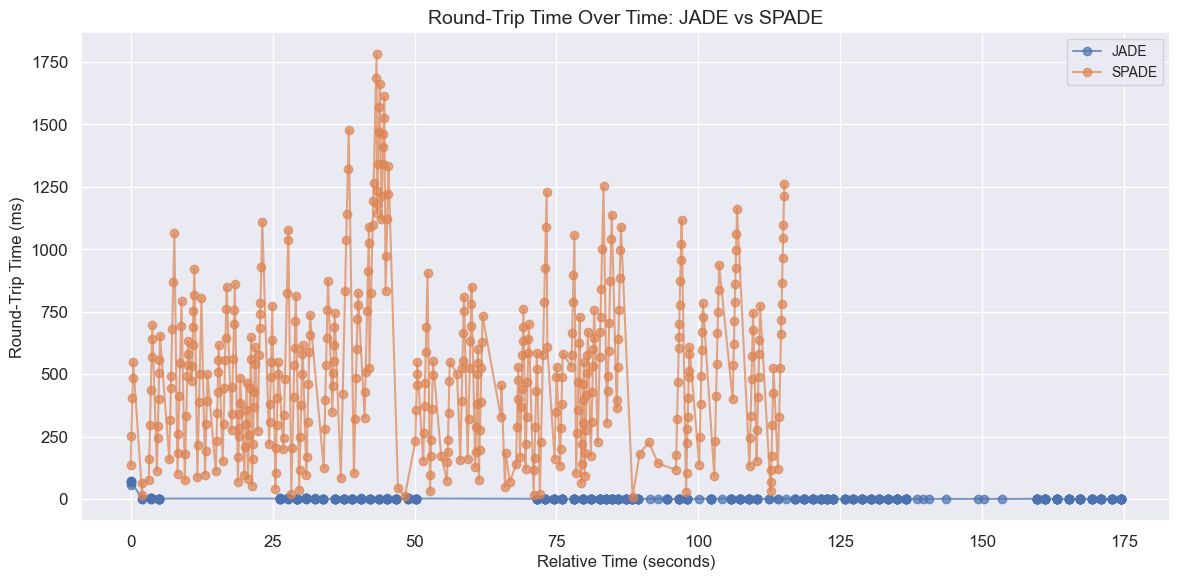

<Figure size 1200x600 with 0 Axes>

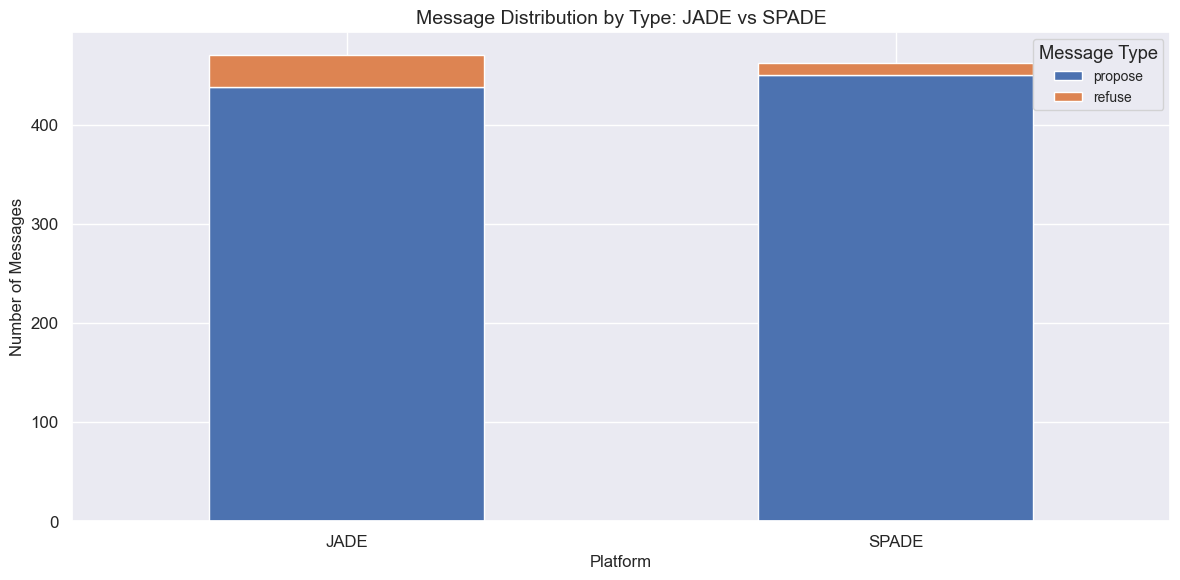


Detailed Statistical Comparison:


RTT_ms                                      MessageSize_bytes  \
            mean  median     std   min      max count              mean   
Platform                                                                  
JADE        1.47    0.59    6.88  0.14    71.59   470            593.32   
SPADE     531.35  500.28  337.84  7.21  1780.26   462            277.35   

                                 Success        
         median     std min  max    mean count  
Platform                                        
JADE      646.5  176.13  19  753    0.93   470  
SPADE     295.5   65.90  19  357    1.00   462


T-test for RTT difference between JADE and SPADE:
t-statistic: -33.7053
p-value: 0.0000
Conclusion: There is a statistically significant difference in RTT between the platforms.

Additional Platform Comparison Metrics:

Message type distribution by platform:


Performative,propose,refuse
Platform,,
JADE,93.19,6.81
SPADE,97.40,2.60



RTT statistics by message type:


mean     std  count
Platform Performative                       
JADE     propose         1.54    7.12    438
         refuse          0.40    0.21     32
SPADE    propose       534.37  337.13    450
         refuse        418.22  360.54     12


Success rate by message type:


Performative,propose,refuse
Platform,,
JADE,100.0,0.0
SPADE,100.0,100.0



----- Platform Comparison Conclusion -----
Based on the analysis above, here are the key findings:
1. JADE shows better average round-trip time (RTT) by 529.89 ms.
2. SPADE has a higher success rate by 6.81%.
3. SPADE has smaller average message size by 315.97 bytes.

4. Performative type effectiveness:
   - For 'propose' messages: JADE is faster by 532.83 ms
   - For 'refuse' messages: JADE is faster by 417.82 ms

Recommendations for MAS Platform Selection:
1. For time-critical applications, consider using the platform with lower RTT
2. For bandwidth-constrained environments, choose the platform with smaller message sizes
3. For reliability-focused systems, prioritize the platform with higher success rates
4. Consider specific message type performance when your application relies heavily on certain message types
5. Extend this analysis with larger datasets and under different network conditions
6. Include message throughput tests under high load for a more complete comparison


In [ ]:
# Enhanced Multi-Scenario MAS Platform Comparison: JADE vs SPADE
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from datetime import datetime
import io
from scipy import stats
from IPython.display import display, HTML

# Set the style for better visualizations
plt.style.use('ggplot')
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)

# Scenario definitions
scenarios = ['small', 'medium', 'large']
platforms = ['jade', 'spade']

# Create empty dictionaries to store dataframes
scenario_data = {}

# Load all scenario data
for scenario in scenarios:
    scenario_data[scenario] = {}
    for platform in platforms:
        file_path = f"rtt/{scenario}/{platform}.csv"
        try:
            # Load data with handling for different encodings and formats
            df = pd.read_csv(file_path, encoding="latin1")
            
            # Add platform and scenario identifiers
            df['Platform'] = platform.upper()
            df['Scenario'] = scenario
            
            # Process data based on platform specifics
            if platform.lower() == 'jade':
                # Convert JADE RTT format (comma decimal separator to period)
                df['RTT_ms'] = df['RTT_ms'].str.replace(',', '.').astype(float)
                # Normalize JADE performatives to lowercase
                df['Performative'] = df['Performative'].str.lower()
            
            # Convert timestamps to datetime objects
            df['Timestamp'] = pd.to_datetime(df['Timestamp'])
            
            # Store in the dictionary
            scenario_data[scenario][platform] = df
            print(f"Loaded {platform.upper()} data for {scenario} scenario: {len(df)} records")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            # Create empty dataframe to prevent errors
            scenario_data[scenario][platform] = pd.DataFrame()

# Function to combine data for a specific scenario
def get_combined_data(scenario):
    dfs = []
    for platform in platforms:
        if not scenario_data[scenario][platform].empty:
            dfs.append(scenario_data[scenario][platform])
    if dfs:
        return pd.concat(dfs, ignore_index=True)
    return pd.DataFrame()

# Combine all data for cross-scenario analysis
all_data = []
for scenario in scenarios:
    for platform in platforms:
        if not scenario_data[scenario][platform].empty:
            all_data.append(scenario_data[scenario][platform])

if all_data:
    all_combined_df = pd.concat(all_data, ignore_index=True)
    print(f"Combined dataset has {len(all_combined_df)} records across all scenarios")
else:
    all_combined_df = pd.DataFrame()
    print("No data could be loaded")

# === SCENARIO-SPECIFIC ANALYSIS FUNCTIONS ===

def analyze_small_scale(scenario_df, scenario_name="small"):
    """
    Analysis focused on small-scale scenario metrics:
    - Base performance comparison
    - Message efficiency
    - Time-series stability
    """
    if scenario_df.empty:
        print(f"No data available for {scenario_name} scenario")
        return
    
    print(f"\n==== SMALL SCALE ANALYSIS: {scenario_name.upper()} SCENARIO ====")
    
    # Basic statistics
    print("\nBasic Performance Statistics:")
    stats_df = scenario_df.groupby('Platform').agg({
        'RTT_ms': ['mean', 'median', 'std', 'min', 'max', 'count'],
        'MessageSize_bytes': ['mean', 'median', 'std'],
        'Success': ['mean', 'count']
    }).round(2)
    display(stats_df)
    
    # 1. Message Size Efficiency Analysis
    print("\nMessage Size Efficiency Analysis:")
    # Calculate bytes per successful message
    scenario_df['Bytes_per_success'] = np.where(
        scenario_df['Success'] == 1, 
        scenario_df['MessageSize_bytes'], 
        np.nan
    )
    
    msg_efficiency = scenario_df.groupby('Platform').agg({
        'Bytes_per_success': ['mean', 'median', 'sum'],
        'MessageSize_bytes': 'sum',
        'Success': 'sum'
    })
    
    # Calculate efficiency metrics
    msg_efficiency['success_rate'] = (msg_efficiency[('Success', 'sum')] / 
                                    msg_efficiency.index.map(lambda x: len(scenario_df[scenario_df['Platform'] == x])))
    msg_efficiency['bytes_per_successful_msg'] = (msg_efficiency[('MessageSize_bytes', 'sum')] / 
                                                msg_efficiency[('Success', 'sum')])
    
    display(msg_efficiency[['success_rate', 'bytes_per_successful_msg']].round(2))
    
    # 2. Time-series stability - Calculate moving average RTT
    plt.figure(figsize=(12, 6))
    for platform, group in scenario_df.groupby('Platform'):
        if len(group) > 0:
            # Sort by timestamp
            group = group.sort_values('Timestamp')
            # Create relative time in seconds from first timestamp
            first_time = group['Timestamp'].min()
            relative_time = [(t - first_time).total_seconds() for t in group['Timestamp']]
            
            # Calculate rolling mean with window size of min(10, len(group)/3)
            window = max(3, min(10, len(group)//3))
            if len(group) > window:
                rolling_mean = group['RTT_ms'].rolling(window=window).mean()
                plt.plot(relative_time, rolling_mean, 
                        label=f'{platform} (Moving Avg)', linewidth=2)
            
            # Plot raw data with lower alpha
            plt.scatter(relative_time, group['RTT_ms'], 
                      alpha=0.3, label=f'{platform} (Raw)')
    
    plt.title(f'Time-Series Stability - RTT Over Time ({scenario_name.capitalize()} Scenario)', fontsize=14)
    plt.xlabel('Relative Time (seconds)', fontsize=12)
    plt.ylabel('RTT (ms)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # 3. Success rate by message type
    success_by_type = pd.crosstab(
        [scenario_df['Platform'], scenario_df['Performative']], 
        scenario_df['Success'],
        normalize='index'
    ) * 100
    
    if 1.0 in success_by_type.columns:
        success_rate = success_by_type[1.0].unstack()
        plt.figure(figsize=(12, 6))
        success_rate.plot(kind='bar', rot=0)
        plt.title(f'Success Rate by Message Type ({scenario_name.capitalize()} Scenario)', fontsize=14)
        plt.xlabel('Platform', fontsize=12)
        plt.ylabel('Success Rate (%)', fontsize=12)
        plt.legend(title='Message Type', fontsize=10)
        plt.ylim(0, 100)
        plt.tight_layout()
        plt.show()

def analyze_medium_scale(scenario_df, small_df=None, scenario_name="medium"):
    """
    Analysis focused on medium-scale scenario metrics:
    - RTT degradation compared to small scale
    - Jitter analysis
    - Percentile analysis
    """
    if scenario_df.empty:
        print(f"No data available for {scenario_name} scenario")
        return
    
    print(f"\n==== MEDIUM SCALE ANALYSIS: {scenario_name.upper()} SCENARIO ====")
    
    # 1. RTT Degradation compared to small scale (if available)
    if small_df is not None and not small_df.empty:
        print("\nRTT Degradation Analysis (compared to small scale):")
        
        # Calculate average RTT for each platform in each scenario
        small_rtt = small_df.groupby('Platform')['RTT_ms'].mean()
        medium_rtt = scenario_df.groupby('Platform')['RTT_ms'].mean()
        
        # Calculate degradation ratio
        degradation = pd.DataFrame({
            'Small Scale RTT': small_rtt,
            'Medium Scale RTT': medium_rtt,
        })
        
        degradation['Degradation Ratio'] = degradation['Medium Scale RTT'] / degradation['Small Scale RTT']
        degradation['Degradation %'] = (degradation['Degradation Ratio'] - 1) * 100
        
        display(degradation.round(2))
    
    # 2. Jitter Analysis (RTT variance/stability)
    print("\nJitter Analysis:")
    
    jitter_results = []
    for platform, group in scenario_df.groupby('Platform'):
        if len(group) > 1:
            # Sort by timestamp and calculate differences between consecutive RTTs
            group_sorted = group.sort_values('Timestamp')
            rtt_diffs = group_sorted['RTT_ms'].diff().dropna().abs()
            
            jitter_results.append({
                'Platform': platform,
                'Mean Jitter (ms)': rtt_diffs.mean(),
                'Median Jitter (ms)': rtt_diffs.median(),
                'Max Jitter (ms)': rtt_diffs.max(),
                '95th Percentile Jitter (ms)': rtt_diffs.quantile(0.95)
            })
    
    jitter_df = pd.DataFrame(jitter_results)
    display(jitter_df.set_index('Platform').round(2))
    
    # Visualize jitter
    if jitter_results:
        plt.figure(figsize=(10, 6))
        for platform, group in scenario_df.groupby('Platform'):
            if len(group) > 1:
                group_sorted = group.sort_values('Timestamp')
                rtt_diffs = group_sorted['RTT_ms'].diff().dropna().abs()
                sns.kdeplot(rtt_diffs, label=platform)
        
        plt.title(f'Jitter Distribution ({scenario_name.capitalize()} Scenario)', fontsize=14)
        plt.xlabel('RTT Difference Between Consecutive Messages (ms)', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.show()
    
    # 3. Percentile Analysis
    print("\nPercentile Analysis:")
    
    percentiles = [50, 75, 90, 95, 99]
    percentile_results = []
    
    for platform, group in scenario_df.groupby('Platform'):
        if not group.empty:
            result = {'Platform': platform}
            for p in percentiles:
                result[f'{p}th Percentile (ms)'] = group['RTT_ms'].quantile(p/100)
            percentile_results.append(result)
    
    percentile_df = pd.DataFrame(percentile_results)
    display(percentile_df.set_index('Platform').round(2))
    
    # Visualize percentiles
    if percentile_results:
        plt.figure(figsize=(12, 6))
        
        # Convert to long format for easier plotting
        plot_data = []
        for platform, group in scenario_df.groupby('Platform'):
            for p in percentiles:
                plot_data.append({
                    'Platform': platform,
                    'Percentile': f'{p}th',
                    'RTT (ms)': group['RTT_ms'].quantile(p/100)
                })
        
        plot_df = pd.DataFrame(plot_data)
        
        # Create grouped bar chart
        sns.barplot(x='Percentile', y='RTT (ms)', hue='Platform', data=plot_df)
        plt.title(f'RTT Percentiles ({scenario_name.capitalize()} Scenario)', fontsize=14)
        plt.ylabel('RTT (ms)', fontsize=12)
        plt.xlabel('Percentile', fontsize=12)
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.show()

def analyze_large_scale(scenario_df, medium_df=None, small_df=None, scenario_name="large"):
    """
    Analysis focused on large-scale scenario metrics:
    - Scalability metrics
    - High percentile analysis
    - Failure patterns under load
    """
    if scenario_df.empty:
        print(f"No data available for {scenario_name} scenario")
        return
    
    print(f"\n==== LARGE SCALE ANALYSIS: {scenario_name.upper()} SCENARIO ====")
    
    # 1. Scalability Analysis (compare across scenarios)
    if small_df is not None and medium_df is not None:
        print("\nScalability Analysis:")
        
        # Aggregate metrics across scenarios
        scenarios_dict = {
            'Small': small_df,
            'Medium': medium_df,
            'Large': scenario_df
        }
        
        scale_results = []
        for scenario_label, df in scenarios_dict.items():
            if not df.empty:
                for platform, group in df.groupby('Platform'):
                    scale_results.append({
                        'Scenario': scenario_label,
                        'Platform': platform,
                        'Avg RTT (ms)': group['RTT_ms'].mean(),
                        'Success Rate (%)': group['Success'].mean() * 100,
                        'Message Count': len(group)
                    })
        
        scale_df = pd.DataFrame(scale_results)
        
        # Create pivot for easier comparison
        rtt_pivot = scale_df.pivot(index='Platform', columns='Scenario', values='Avg RTT (ms)')
        success_pivot = scale_df.pivot(index='Platform', columns='Scenario', values='Success Rate (%)')
        
        print("Average RTT across scenarios:")
        display(rtt_pivot.round(2))
        
        print("\nSuccess Rate across scenarios:")
        display(success_pivot.round(2))
        
        # Calculate scale efficiency
        if 'Small' in rtt_pivot.columns and 'Large' in rtt_pivot.columns:
            scale_efficiency = pd.DataFrame(index=rtt_pivot.index)
            scale_efficiency['RTT Scale Factor'] = rtt_pivot['Large'] / rtt_pivot['Small']
            scale_efficiency['Success Scale Factor'] = success_pivot['Large'] / success_pivot['Small']
            
            print("\nScale Efficiency (Large/Small ratio):")
            print("Lower RTT Factor is better (less degradation with scale)")
            print("Higher Success Factor is better (maintained success rate with scale)")
            display(scale_efficiency.round(3))
        
        # Visualize scaling behavior
        plt.figure(figsize=(10, 6))
        for platform in scale_df['Platform'].unique():
            platform_data = scale_df[scale_df['Platform'] == platform]
            plt.plot(platform_data['Scenario'], platform_data['Avg RTT (ms)'], 
                    marker='o', label=platform)
        
        plt.title('RTT Scaling Behavior Across Scenarios', fontsize=14)
        plt.xlabel('Scenario Scale', fontsize=12)
        plt.ylabel('Average RTT (ms)', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    # 2. High Percentile Analysis (focus on worst-case performance)
    print("\nHigh Percentile Analysis (worst-case performance):")
    
    high_percentiles = [90, 95, 99, 99.9]
    percentile_results = []
    
    for platform, group in scenario_df.groupby('Platform'):
        if len(group) >= 100:  # Need sufficient data for high percentiles
            result = {'Platform': platform}
            for p in high_percentiles:
                result[f'{p}th Percentile (ms)'] = group['RTT_ms'].quantile(p/100)
            
            # Calculate tail latency metrics
            result['P99/P50 Ratio'] = (result['99th Percentile (ms)'] / 
                                     group['RTT_ms'].quantile(0.50))
            percentile_results.append(result)
    
    if percentile_results:
        percentile_df = pd.DataFrame(percentile_results)
        display(percentile_df.set_index('Platform').round(2))
        
        # Visualize tail latency
        plt.figure(figsize=(10, 6))
        for platform, group in scenario_df.groupby('Platform'):
            if len(group) >= 100:
                # Plot CDF of RTT
                sorted_rtt = np.sort(group['RTT_ms'])
                cdf = np.arange(1, len(sorted_rtt) + 1) / len(sorted_rtt)
                plt.plot(sorted_rtt, cdf, label=platform)
                
                # Add markers for p99
                p99 = group['RTT_ms'].quantile(0.99)
                plt.axvline(x=p99, linestyle='--', color='gray', alpha=0.5)
                plt.text(p99, 0.5, f'{platform} P99', rotation=90, alpha=0.7)
        
        plt.title(f'RTT Cumulative Distribution ({scenario_name.capitalize()} Scenario)', fontsize=14)
        plt.xlabel('RTT (ms)', fontsize=12)
        plt.ylabel('Cumulative Probability', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    # 3. Failure Pattern Analysis
    print("\nFailure Pattern Analysis:")
    
    # Calculate failure rate by message type
    failure_by_type = scenario_df.groupby(['Platform', 'Performative'])['Success'].agg(
        ['count', 'sum', lambda x: (1 - x.mean()) * 100]
    ).rename(columns={'<lambda_0>': 'Failure Rate (%)'})
    
    display(failure_by_type.round(2))
    
    # Visualize failure patterns
    plt.figure(figsize=(12, 6))
    for platform, group in scenario_df.groupby('Platform'):
        # Get failure counts by performative
        failure_counts = group[group['Success'] == 0].groupby('Performative').size()
        if not failure_counts.empty:
            failure_counts.plot(kind='bar', alpha=0.7, label=platform)
    
    plt.title(f'Message Failures by Type ({scenario_name.capitalize()} Scenario)', fontsize=14)
    plt.xlabel('Message Type', fontsize=12)
    plt.ylabel('Number of Failures', fontsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

def cross_scenario_analysis(all_data_df):
    """
    Cross-scenario comparative analysis:
    - Platform performance across all scenarios
    - Scaling behavior
    - Consistency metrics
    """
    if all_data_df.empty:
        print("No data available for cross-scenario analysis")
        return
    
    print("\n==== CROSS-SCENARIO COMPARATIVE ANALYSIS ====")
    
    # 1. Platform Performance Matrix
    print("\nPlatform Performance Matrix:")
    
    # Create a pivot table with scenarios as rows and platforms as columns
    performance_matrix = all_data_df.pivot_table(
        index='Scenario', 
        columns='Platform',
        values=['RTT_ms', 'Success'],
        aggfunc={'RTT_ms': 'mean', 'Success': 'mean'}
    )
    
    # Format success rate as percentage
    performance_matrix[('Success', 'JADE')] = performance_matrix[('Success', 'JADE')] * 100
    performance_matrix[('Success', 'SPADE')] = performance_matrix[('Success', 'SPADE')] * 100
    
    display(performance_matrix.round(2))
    
    # 2. Scaling Efficiency Analysis
    if len(all_data_df['Scenario'].unique()) >= 2:
        print("\nScaling Efficiency Analysis:")
        
        # Calculate average metrics by platform and scenario
        scaling_metrics = all_data_df.groupby(['Platform', 'Scenario']).agg({
            'RTT_ms': ['mean', 'std'],
            'Success': 'mean',
            'MessageSize_bytes': 'mean'
        }).reset_index()
        
        # Reshape for easier comparison
        for platform in all_data_df['Platform'].unique():
            platform_data = scaling_metrics[scaling_metrics['Platform'] == platform]
            
            if len(platform_data) > 1:
                # Sort by scenario (assuming small, medium, large order)
                scenario_order = {'small': 0, 'medium': 1, 'large': 2}
                platform_data = platform_data.sort_values(
                    by='Scenario', 
                    key=lambda x: x.map(scenario_order)
                )
                
                # Calculate scaling factors between consecutive scenarios
                print(f"\n{platform} Scaling Factors:")
                
                for i in range(1, len(platform_data)):
                    prev_scenario = platform_data.iloc[i-1]['Scenario']
                    curr_scenario = platform_data.iloc[i]['Scenario']
                    
                    prev_rtt = platform_data.iloc[i-1][('RTT_ms', 'mean')]
                    curr_rtt = platform_data.iloc[i][('RTT_ms', 'mean')]
                    
                    prev_success = platform_data.iloc[i-1][('Success', 'mean')]
                    curr_success = platform_data.iloc[i][('Success', 'mean')]
                    
                    rtt_factor = curr_rtt / prev_rtt
                    success_factor = curr_success / prev_success
                    
                    print(f"{prev_scenario} → {curr_scenario}:")
                    print(f"  RTT Degradation Factor: {rtt_factor:.2f}x")
                    print(f"  Success Rate Factor: {success_factor:.2f}x")
    
    # 3. Platform Consistency Across Scenarios
    print("\nPlatform Consistency Analysis:")
    
    consistency_metrics = []
    for platform in all_data_df['Platform'].unique():
        platform_data = all_data_df[all_data_df['Platform'] == platform]
        
        # Calculate coefficient of variation across scenarios
        scenario_means = platform_data.groupby('Scenario')['RTT_ms'].mean()
        rtt_cv = scenario_means.std() / scenario_means.mean() if scenario_means.mean() > 0 else np.nan
        
        # Calculate success rate consistency
        success_means = platform_data.groupby('Scenario')['Success'].mean()
        success_cv = success_means.std() / success_means.mean() if success_means.mean() > 0 else np.nan
        
        consistency_metrics.append({
            'Platform': platform,
            'RTT CoV Across Scenarios': rtt_cv,
            'Success Rate CoV': success_cv,
            'Min RTT': platform_data['RTT_ms'].min(),
            'Max RTT': platform_data['RTT_ms'].max(),
            'RTT Range': platform_data['RTT_ms'].max() - platform_data['RTT_ms'].min()
        })
    
    consistency_df = pd.DataFrame(consistency_metrics)
    display(consistency_df.set_index('Platform').round(3))
    
    # 4. Performance Radar Chart
    print("\nPerformance Radar Chart (normalized metrics):")
    
    # Calculate normalized metrics for radar chart
    radar_metrics = all_data_df.groupby('Platform').agg({
        'RTT_ms': 'mean',
        'Success': 'mean',
        'MessageSize_bytes': 'mean'
    })
    
    # Normalize metrics (lower RTT is better, higher success is better, lower message size is better)
    max_rtt = radar_metrics['RTT_ms'].max() * 1.2
    max_size = radar_metrics['MessageSize_bytes'].max() * 1.2
    
    radar_metrics['RTT_Normalized'] = max_rtt / radar_metrics['RTT_ms']
    radar_metrics['MessageSize_Normalized'] = max_size / radar_metrics['MessageSize_bytes']
    radar_metrics['Success_Normalized'] = radar_metrics['Success'] * 100
    
    # Visualize with radar chart
    categories = ['RTT\n(faster)', 'Message Size\n(smaller)', 'Success Rate\n(higher)']
    N = len(categories)
    
    # Create angles for radar chart
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
    
    # Plot each platform
    for i, platform in enumerate(radar_metrics.index):
        values = [
            radar_metrics.loc[platform, 'RTT_Normalized'],
            radar_metrics.loc[platform, 'MessageSize_Normalized'],
            radar_metrics.loc[platform, 'Success_Normalized']
        ]
        values += values[:1]  # Close the loop
        
        ax.plot(angles, values, linewidth=2, label=platform)
        ax.fill(angles, values, alpha=0.25)
    
    # Set category labels
    plt.xticks(angles[:-1], categories, fontsize=12)
    
    # Set y-axis limits
    ax.set_ylim(0, 110)
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=9)
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Overall Platform Performance Comparison', fontsize=15)
    plt.tight_layout()
    plt.show()

# ===== PERFORM THE ANALYSIS =====

# Check if we have data for each scenario
for scenario in scenarios:
    combined_scenario_df = get_combined_data(scenario)
    if not combined_scenario_df.empty:
        print(f"\n{'='*50}")
        print(f"ANALYSIS FOR {scenario.upper()} SCENARIO")
        print(f"{'='*50}")
        
        if scenario == 'small':
            analyze_small_scale(combined_scenario_df)
        elif scenario == 'medium':
            small_df = get_combined_data('small')
            analyze_medium_scale(combined_scenario_df, small_df)
        elif scenario == 'large':
            small_df = get_combined_data('small')
            medium_df = get_combined_data('medium')
            analyze_large_scale(combined_scenario_df, medium_df, small_df)

# Perform cross-scenario analysis if we have data from multiple scenarios
if not all_combined_df.empty and len(all_combined_df['Scenario'].unique()) > 1:
    cross_scenario_analysis(all_combined_df)

# ===== SUMMARY AND RECOMMENDATIONS =====

print("\n")
print("="*80)
print("SUMMARY AND RECOMMENDATIONS")
print("="*80)

# Collect key metrics for final recommendation
summary_metrics = {}
if not all_combined_df.empty:
    for platform in all_combined_df['Platform'].unique():
        platform_data = all_combined_df[all_combined_df['Platform'] == platform]
        
        summary_metrics[platform] = {
            'Overall RTT (ms)': platform_data['RTT_ms'].mean(),
            'Success Rate (%)': platform_data['Success'].mean() * 100,
            'Avg Message Size (bytes)': platform_data['MessageSize_bytes'].mean()
        }
        
        # Add scenario-specific metrics if available
        for scenario in scenarios:
            scenario_data = platform_data[platform_data['Scenario'] == scenario]
            if not scenario_data.empty:
                summary_metrics[platform][f'{scenario.capitalize()} RTT (ms)'] = scenario_data['RTT_ms'].mean()
                summary_metrics[platform][f'{scenario.capitalize()} Success (%)'] = scenario_data['Success'].mean() * 100
        
        # Calculate scale efficiency if we have both small and large scenarios
        if 'small' in all_combined_df['Scenario'].unique() and 'large' in all_combined_df['Scenario'].unique():
            small_data = platform_data[platform_data['Scenario'] == 'small']
            large_data = platform_data[platform_data['Scenario'] == 'large']
            
            if not small_data.empty and not large_data.empty:
                rtt_scale_factor = large_data['RTT_ms'].mean() / small_data['RTT_ms'].mean()
                success_scale_factor = large_data['Success'].mean() / small_data['Success'].mean()
                
                summary_metrics[platform]['RTT Scale Factor'] = rtt_scale_factor
                summary_metrics[platform]['Success Scale Factor'] = success_scale_factor

# Convert to DataFrame for easier display
summary_df = pd.DataFrame(summary_metrics)
display(summary_df.round(2))

# Generate recommendations
print("\nPlatform Recommendations Based on Scenario:")

# Small-scale scenario recommendation
if 'small' in all_combined_df['Scenario'].unique():
    small_metrics = all_combined_df[all_combined_df['Scenario'] == 'small'].groupby('Platform').agg({
        'RTT_ms': 'mean',
        'Success': 'mean',
        'MessageSize_bytes': 'mean'
    })
    
    best_small_rtt = small_metrics['RTT_ms'].idxmin()
    best_small_success = small_metrics['Success'].idxmax()
    best_small_size = small_metrics['MessageSize_bytes'].idxmin()
    
    print(f"\n1. For Small-Scale Scenarios (few agents, basic communication):")
    print(f"   - Best RTT Performance: {best_small_rtt}")
    print(f"   - Best Success Rate: {best_small_success}")
    print(f"   - Best Message Size Efficiency: {best_small_size}")
    
    if best_small_rtt == best_small_success:
        print(f"   → Recommendation for small-scale: {best_small_rtt} (better overall performance)")
    else:
        print(f"   → Recommendation for small-scale: {best_small_rtt if small_metrics.loc[best_small_rtt, 'Success'] > 0.95 else best_small_success} (balanced performance)")

# Medium-scale scenario recommendation
if 'medium' in all_combined_df['Scenario'].unique():
    medium_metrics = all_combined_df[all_combined_df['Scenario'] == 'medium'].groupby('Platform').agg({
        'RTT_ms': 'mean',
        'Success': 'mean',
        'MessageSize_bytes': 'mean'
    })
    
    best_medium_rtt = medium_metrics['RTT_ms'].idxmin()
    best_medium_success = medium_metrics['Success'].idxmax()
    
    print(f"\n2. For Medium-Scale Scenarios (moderate agent count, more complex interactions):")
    print(f"   - Best RTT Performance: {best_medium_rtt}")
    print(f"   - Best Success Rate: {best_medium_success}")
    
    # Consider both metrics for recommendation
    if best_medium_rtt == best_medium_success:
        print(f"   → Recommendation for medium-scale: {best_medium_rtt} (better overall performance)")
    else:
        # If success rate is above 95%, prioritize RTT, otherwise prioritize success
        if medium_metrics.loc[best_medium_rtt, 'Success'] > 0.95:
            print(f"   → Recommendation for medium-scale: {best_medium_rtt} (good success rate with better RTT)")
        else:
            print(f"   → Recommendation for medium-scale: {best_medium_success} (reliability is critical at medium scale)")

# Large-scale scenario recommendation
if 'large' in all_combined_df['Scenario'].unique():
    large_metrics = all_combined_df[all_combined_df['Scenario'] == 'large'].groupby('Platform').agg({
        'RTT_ms': 'mean',
        'Success': 'mean',
        'MessageSize_bytes': 'mean'
    })
    
    best_large_rtt = large_metrics['RTT_ms'].idxmin()
    best_large_success = large_metrics['Success'].idxmax()
    
    print(f"\n3. For Large-Scale Scenarios (many agents, heavy load):")
    print(f"   - Best RTT Performance: {best_large_rtt}")
    print(f"   - Best Success Rate: {best_large_success}")
    
    # At large scale, success rate becomes even more important
    if best_large_rtt == best_large_success:
        print(f"   → Recommendation for large-scale: {best_large_rtt} (better overall performance)")
    else:
        # Strong bias toward success rate in large-scale systems
        if large_metrics.loc[best_large_rtt, 'Success'] > 0.98 * large_metrics.loc[best_large_success, 'Success']:
            print(f"   → Recommendation for large-scale: {best_large_rtt} (good success rate with much better RTT)")
        else:
            print(f"   → Recommendation for large-scale: {best_large_success} (reliability is critical at large scale)")

# Scale efficiency recommendation
if 'small' in all_combined_df['Scenario'].unique() and 'large' in all_combined_df['Scenario'].unique():
    # Calculate scale efficiency for each platform
    scale_metrics = {}
    for platform in all_combined_df['Platform'].unique():
        small_data = all_combined_df[(all_combined_df['Platform'] == platform) & 
                                    (all_combined_df['Scenario'] == 'small')]
        large_data = all_combined_df[(all_combined_df['Platform'] == platform) & 
                                   (all_combined_df['Scenario'] == 'large')]
        
        if not small_data.empty and not large_data.empty:
            rtt_ratio = large_data['RTT_ms'].mean() / small_data['RTT_ms'].mean()
            success_ratio = large_data['Success'].mean() / small_data['Success'].mean()
            
            # Combined scale efficiency score (lower is better)
            # Weight success degradation more heavily than RTT degradation
            scale_metrics[platform] = (rtt_ratio * 0.4) + ((1/success_ratio) * 0.6)
    
    if scale_metrics:
        best_scaling = min(scale_metrics, key=scale_metrics.get)
        print(f"\n4. For Systems That Need To Scale (from small to large):")
        print(f"   → Recommendation for scalability: {best_scaling} (better scale efficiency)")

print("\nOverall Platform Recommendation:")

# Collect all recommendations for final decision
all_recommendations = []
overall_ratings = {}

for platform in all_combined_df['Platform'].unique():
    platform_data = all_combined_df[all_combined_df['Platform'] == platform]
    
    # Calculate overall weighted metrics
    avg_rtt = platform_data['RTT_ms'].mean()
    avg_success = platform_data['Success'].mean()
    
    # Lower score is better (normalized and weighted)
    # Weight success rate more heavily (70%) than RTT (30%)
    max_rtt = all_combined_df['RTT_ms'].max()
    overall_score = (avg_rtt / max_rtt * 0.3) + ((1 - avg_success) * 0.7)
    overall_ratings[platform] = overall_score

if overall_ratings:
    best_overall = min(overall_ratings, key=overall_ratings.get)
    
    print(f"\n→ Best Overall Platform: {best_overall}")
    print(f"\nRationale:")
    
    # Explain the recommendation
    best_platform_data = all_combined_df[all_combined_df['Platform'] == best_overall]
    worst_platform = max(overall_ratings, key=overall_ratings.get)
    worst_platform_data = all_combined_df[all_combined_df['Platform'] == worst_platform]
    
    print(f"• {best_overall} has an average RTT of {best_platform_data['RTT_ms'].mean():.2f} ms")
    print(f"• {best_overall} has a success rate of {best_platform_data['Success'].mean()*100:.2f}%")
    
    # Compare with the other platform
    rtt_diff = worst_platform_data['RTT_ms'].mean() - best_platform_data['RTT_ms'].mean()
    success_diff = (best_platform_data['Success'].mean() - worst_platform_data['Success'].mean()) * 100
    
    if rtt_diff > 0:
        print(f"• {best_overall} is {rtt_diff:.2f} ms faster than {worst_platform}")
    
    if success_diff > 0:
        print(f"• {best_overall} has a {success_diff:.2f}% higher success rate than {worst_platform}")
    
    # Add scenario-specific insights
    for scenario in scenarios:
        scenario_data = best_platform_data[best_platform_data['Scenario'] == scenario]
        if not scenario_data.empty:
            other_scenario = worst_platform_data[worst_platform_data['Scenario'] == scenario]
            if not other_scenario.empty:
                rtt_advantage = other_scenario['RTT_ms'].mean() - scenario_data['RTT_ms'].mean()
                if rtt_advantage > 0:
                    print(f"• In {scenario} scenarios, {best_overall} is {rtt_advantage:.2f} ms faster")

print("\nSpecific Use Case Recommendations:")
print("1. For Time-Critical Applications (e.g., real-time control systems):")
best_rtt = all_combined_df.groupby('Platform')['RTT_ms'].mean().idxmin()
print(f"   → Choose {best_rtt} (better RTT performance)")

print("\n2. For Mission-Critical Systems (where reliability is paramount):")
best_success = all_combined_df.groupby('Platform')['Success'].mean().idxmax()
print(f"   → Choose {best_success} (higher success rate)")

print("\n3. For Resource-Constrained Environments (e.g., IoT, mobile):")
best_size = all_combined_df.groupby('Platform')['MessageSize_bytes'].mean().idxmin()
print(f"   → Choose {best_size} (smaller message size)")

print("\n4. For Systems That Will Grow Over Time:")
if 'small' in all_combined_df['Scenario'].unique() and 'large' in all_combined_df['Scenario'].unique():
    if scale_metrics:
        print(f"   → Choose {best_scaling} (better scaling properties)")

print("\nFinal Notes:")
print("• These recommendations are based on the provided CSV data and may vary under different conditions")
print("• Consider running additional tests that simulate your specific use case")
print("• The ideal platform choice depends on your specific requirements and constraints")
print("• Remember that implementation details and familiarity with the platform may also impact development efficiency")